In [3]:
import pandas as pd
import numpy as np
import datetime as dt

# Generar un DataFrame con los datos de los cuatro ficheros 

emisiones_2016 = pd.read_csv('emisiones-2016.csv', sep = ';')
emisiones_2017 = pd.read_csv('emisiones-2017.csv', sep = ';')
emisiones_2018 = pd.read_csv('emisiones-2018.csv', sep = ';')
emisiones_2019 = pd.read_csv('emisiones-2019.csv', sep = ';')
emisiones = pd.concat([emisiones_2016, emisiones_2017, emisiones_2018, emisiones_2019])
emisiones

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,D01,V01,D02,...,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
0,28,79,4,1,28079004_1_38,2016,1,8.0,V,7.0,...,9.0,V,7.0,V,8.0,V,9.0,V,9.0,V
1,28,79,4,1,28079004_1_38,2016,2,12.0,V,13.0,...,7.0,V,8.0,V,9.0,V,0.0,N,0.0,N
2,28,79,4,1,28079004_1_38,2016,3,11.0,V,10.0,...,8.0,V,7.0,V,8.0,V,10.0,V,8.0,V
3,28,79,4,1,28079004_1_38,2016,4,8.0,V,9.0,...,9.0,V,8.0,V,8.0,V,8.0,V,0.0,N
4,28,79,4,1,28079004_1_38,2016,5,7.0,V,8.0,...,7.0,V,7.0,V,7.0,V,7.0,V,7.0,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,28,79,60,14,28079060_14_6,2019,8,94.0,V,104.0,...,88.0,V,90.0,V,99.0,V,108.0,V,98.0,V
1832,28,79,60,14,28079060_14_6,2019,9,88.0,V,82.0,...,54.0,V,68.0,V,70.0,V,55.0,V,0.0,N
1833,28,79,60,14,28079060_14_6,2019,10,44.0,V,75.0,...,28.0,V,33.0,V,16.0,V,19.0,V,47.0,V
1834,28,79,60,14,28079060_14_6,2019,11,41.0,V,55.0,...,55.0,V,52.0,V,47.0,V,56.0,V,0.0,N


In [4]:
# Filtrar las columnas del DataFrame para quedarse con las columnas ESTACION, MAGNITUD, AÑO, MES y las correspondientes a los días D01, D02, etc. 
columnas = ['ESTACION', 'MAGNITUD', 'ANO', 'MES']
columnas.extend([col for col in emisiones if col.startswith('D')])
emisiones = emisiones[columnas]
emisiones


,ESTACION,MAGNITUD,ANO,MES,D01,D02,D03,D04,D05,D06,...,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31
0,4,1,2016,1,8.0,7.0,6.0,6.0,7.0,6.0,...,10.0,11.0,11.0,13.0,12.0,9.0,7.0,8.0,9.0,9.0
1,4,1,2016,2,12.0,13.0,9.0,9.0,11.0,9.0,...,11.0,10.0,9.0,8.0,7.0,7.0,8.0,9.0,0.0,0.0
2,4,1,2016,3,11.0,10.0,9.0,9.0,7.0,8.0,...,8.0,8.0,9.0,9.0,9.0,8.0,7.0,8.0,10.0,8.0
3,4,1,2016,4,8.0,9.0,9.0,8.0,8.0,9.0,...,8.0,8.0,8.0,8.0,9.0,9.0,8.0,8.0,8.0,0.0
4,4,1,2016,5,7.0,8.0,9.0,9.0,8.0,8.0,...,7.0,7.0,8.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,60,14,2019,8,94.0,104.0,106.0,99.0,77.0,82.0,...,86.0,97.0,104.0,96.0,85.0,88.0,90.0,99.0,108.0,98.0
1832,60,14,2019,9,88.0,82.0,80.0,92.0,79.0,75.0,...,59.0,46.0,49.0,69.0,57.0,54.0,68.0,70.0,55.0,0.0
1833,60,14,2019,10,44.0,75.0,44.0,54.0,65.0,68.0,...,37.0,39.0,45.0,21.0,23.0,28.0,33.0,16.0,19.0,47.0
1834,60,14,2019,11,41.0,55.0,79.0,65.0,64.0,51.0,...,38.0,75.0,69.0,45.0,35.0,55.0,52.0,47.0,56.0,0.0


In [5]:
emisiones_2019 = pd.read_csv('emisiones-2019.csv', sep = ';')
emisiones_2019

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,D01,V01,D02,...,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
0,28,79,4,1,28079004_1_38,2019,1,18.0,V,20.0,...,15.0,V,15.0,V,15.0,V,14.0,V,14.0,V
1,28,79,4,1,28079004_1_38,2019,2,13.0,V,13.0,...,19.0,V,20.0,V,0.0,N,0.0,N,0.0,N
2,28,79,4,1,28079004_1_38,2019,3,18.0,V,18.0,...,6.0,V,7.0,V,6.0,V,4.0,V,4.0,V
3,28,79,4,1,28079004_1_38,2019,4,3.0,V,4.0,...,3.0,V,2.0,V,2.0,V,2.0,V,0.0,N
4,28,79,4,1,28079004_1_38,2019,5,1.0,V,1.0,...,2.0,V,1.0,V,1.0,V,1.0,V,2.0,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,28,79,60,14,28079060_14_6,2019,8,94.0,V,104.0,...,88.0,V,90.0,V,99.0,V,108.0,V,98.0,V
1832,28,79,60,14,28079060_14_6,2019,9,88.0,V,82.0,...,54.0,V,68.0,V,70.0,V,55.0,V,0.0,N
1833,28,79,60,14,28079060_14_6,2019,10,44.0,V,75.0,...,28.0,V,33.0,V,16.0,V,19.0,V,47.0,V
1834,28,79,60,14,28079060_14_6,2019,11,41.0,V,55.0,...,55.0,V,52.0,V,47.0,V,56.0,V,0.0,N


In [6]:
# Reestructurar el DataFrame para que los valores de los contaminantes de las columnas de los días aparezcan en una única columna.
emisiones = emisiones.melt(id_vars=['ESTACION', 'MAGNITUD', 'ANO', 'MES'], var_name='DIA', value_name='VALOR')
emisiones

,ESTACION,MAGNITUD,ANO,MES,DIA,VALOR
0,4,1,2016,1,D01,8.0
1,4,1,2016,2,D01,12.0
2,4,1,2016,3,D01,11.0
3,4,1,2016,4,D01,8.0
4,4,1,2016,5,D01,7.0
...,...,...,...,...,...,...
225241,60,14,2019,8,D31,98.0
225242,60,14,2019,9,D31,0.0
225243,60,14,2019,10,D31,47.0
225244,60,14,2019,11,D31,0.0


In [8]:
# Crear una nueva columna con las fechas a partir del año, mes y día
# Primero eliminamos el caracter D del comienzo de la columna de los días
emisiones['DIA'] = emisiones.DIA.str.strip('D')
# Concatenamos las columnas del año, mes y día
emisiones['FECHA'] = emisiones.ANO.apply(str) + '/' + emisiones.MES.apply(str) + '/' + emisiones.DIA.apply(str)
# Convertimos la nueva columna al tipo fecha
emisiones['FECHA'] = pd.to_datetime(emisiones.FECHA, format='%Y/%m/%d', infer_datetime_format=True, errors='coerce')
emisiones

C:\Users\osedr\AppData\Local\Temp\ipykernel_28960\3065073658.py:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  emisiones['FECHA'] = pd.to_datetime(emisiones.FECHA, format='%Y/%m/%d', infer_datetime_format=True, errors='coerce')


,ESTACION,MAGNITUD,ANO,MES,DIA,VALOR,FECHA
0,4,1,2016,1,01,8.0,2016-01-01
1,4,1,2016,2,01,12.0,2016-02-01
2,4,1,2016,3,01,11.0,2016-03-01
3,4,1,2016,4,01,8.0,2016-04-01
4,4,1,2016,5,01,7.0,2016-05-01
...,...,...,...,...,...,...,...
225241,60,14,2019,8,31,98.0,2019-08-31
225242,60,14,2019,9,31,0.0,NaT
225243,60,14,2019,10,31,47.0,2019-10-31
225244,60,14,2019,11,31,0.0,NaT


In [8]:

# Ordenar el el dataframe por estación, magnitud y fecha
emisiones.sort_values(['ESTACION', 'MAGNITUD', 'FECHA'])

KeyError: 'FECHA'

In [10]:
#muestra los 20 primeras filas
print(emisiones.head(20)) 

    ESTACION  MAGNITUD   ANO  MES DIA  VALOR      FECHA
0          4         1  2016    1  01    8.0 2016-01-01
1          4         1  2016    2  01   12.0 2016-02-01
2          4         1  2016    3  01   11.0 2016-03-01
3          4         1  2016    4  01    8.0 2016-04-01
4          4         1  2016    5  01    7.0 2016-05-01
5          4         1  2016    6  01    7.0 2016-06-01
6          4         1  2016    7  01    8.0 2016-07-01
7          4         1  2016    8  01    7.0 2016-08-01
8          4         1  2016    9  01    7.0 2016-09-01
9          4         1  2016   10  01    9.0 2016-10-01
10         4         1  2016   11  01    4.0 2016-11-01
11         4         1  2016   12  01    3.0 2016-12-01
12         4         6  2016    1  01    0.4 2016-01-01
13         4         6  2016    2  01    0.7 2016-02-01
14         4         6  2016    3  01    0.6 2016-03-01
15         4         6  2016    4  01    0.3 2016-04-01
16         4         6  2016    5  01    0.2 201

In [11]:
#Muestra las ultimas 20 filas
print(emisiones.tail(20)) 

        ESTACION  MAGNITUD   ANO  MES DIA  VALOR      FECHA
225226        60        12  2019    5  31   32.0 2019-05-31
225227        60        12  2019    6  31    0.0        NaT
225228        60        12  2019    7  31   16.0 2019-07-31
225229        60        12  2019    8  31   26.0 2019-08-31
225230        60        12  2019    9  31    0.0        NaT
225231        60        12  2019   10  31   21.0 2019-10-31
225232        60        12  2019   11  31    0.0        NaT
225233        60        12  2019   12  31  202.0 2019-12-31
225234        60        14  2019    1  31   56.0 2019-01-31
225235        60        14  2019    2  31    0.0        NaT
225236        60        14  2019    3  31   80.0 2019-03-31
225237        60        14  2019    4  31    0.0        NaT
225238        60        14  2019    5  31   85.0 2019-05-31
225239        60        14  2019    6  31    0.0        NaT
225240        60        14  2019    7  31   92.0 2019-07-31
225241        60        14  2019    8  3

In [12]:
# Eliminar las filas con fechas no válidas
emisiones = emisiones.drop(emisiones[np.isnat(emisiones.FECHA)].index)
# Ordenar el el dataframe por estación, magnitud y fecha
emisiones.sort_values(['ESTACION', 'MAGNITUD', 'FECHA'])

,ESTACION,MAGNITUD,ANO,MES,DIA,VALOR,FECHA
0,4,1,2016,1,01,8.0,2016-01-01
7266,4,1,2016,1,02,7.0,2016-01-02
14532,4,1,2016,1,03,6.0,2016-01-03
21798,4,1,2016,1,04,6.0,2016-01-04
29064,4,1,2016,1,05,7.0,2016-01-05
...,...,...,...,...,...,...,...
196181,60,14,2019,12,27,17.0,2019-12-27
203447,60,14,2019,12,28,13.0,2019-12-28
210713,60,14,2019,12,29,14.0,2019-12-29
217979,60,14,2019,12,30,5.0,2019-12-30


In [13]:
# Mostrar las estaciones disponibles
print('Estaciones:', emisiones.ESTACION.unique())
# Mostrar los contaminantes disponibles
print('Contaminantes:', emisiones.MAGNITUD.unique())

Estaciones: [ 4  8 11 16 17 18 24 27 35 36 38 39 40 47 48 49 50 54 55 56 57 58 59 60]
Contaminantes: [ 1  6  7  8 12  9 10 14 20 30 35 42 43 44]


In [14]:
# Función que devuelve las emisiones de un contaminante dado en una estación y rango de fechas dado.
def evolucion(estacion, contaminante, desde, hasta):
    return emisiones[(emisiones.ESTACION == estacion) & (emisiones.MAGNITUD == contaminante) & 
    (emisiones.FECHA >= desde) & (emisiones.FECHA <= hasta)].sort_values('FECHA').VALOR
evolucion(56, 8, dt.datetime.strptime('2018/10/25', '%Y/%m/%d'),
          dt.datetime.strptime('2019/02/12', '%Y/%m/%d'))

179559    89.0
186825    87.0
194091    46.0
201357    38.0
208623    29.0
          ... 
57841     82.0
65107     64.0
72373     26.0
79639     59.0
86905     71.0
Name: VALOR, Length: 111, dtype: float64

In [15]:
# Resumen descriptivo por contaminantes
emisiones.groupby('MAGNITUD').VALOR.describe()

,count,mean,std,min,25%,50%,75%,max
MAGNITUD,,,,,,,,
1,14610.0,7.428953,7.012504,0.00,4.00,7.00,10.00,610.00
6,14610.0,0.350233,0.215935,0.00,0.20,0.30,0.40,14.90
7,35064.0,20.446412,135.123509,0.00,4.00,9.00,23.00,24742.00
8,35064.0,37.677618,20.118050,0.00,22.00,35.00,50.00,148.00
9,8948.0,10.087729,10.643591,0.00,6.00,9.00,13.00,850.00
10,17897.0,18.772923,35.723619,0.00,10.00,16.00,24.00,4481.00
12,35064.0,67.959417,61.443940,0.00,29.00,48.00,84.00,1005.00
14,20454.0,49.941772,24.753120,0.00,31.00,52.00,69.00,336.00
20,8766.0,2.364944,4.236706,0.00,0.80,1.60,2.80,195.00


In [17]:
# Resumen estadistico por contaminantes y estaciones
emisiones.groupby(['ESTACION', 'MAGNITUD']).VALOR.describe()

count       mean        std  min   25%   50%    75%    max
ESTACION MAGNITUD                                                             
4        1         1461.0   7.329911  16.379050  1.0   4.0   7.0    9.0  610.0
         6         1461.0   0.411499   0.172902  0.1   0.3   0.4    0.5    1.3
         7         1461.0  31.939767  37.667968  0.0   8.0  16.0   42.0  239.0
         8         1461.0  44.398357  17.766063  0.0  31.0  43.0   55.0  105.0
         12        1461.0  93.341547  72.436531  0.0  44.0  69.0  119.0  467.0
...                   ...        ...        ...  ...   ...   ...    ...    ...
60       7         1461.0  12.326489  19.593109  1.0   2.0   4.0   12.0  151.0
         8         1461.0  31.125941  18.101896  3.0  18.0  27.0   41.0  101.0
         10        1461.0  17.033539  12.205022  1.0   9.0  14.0   21.0  215.0
         12        1461.0  50.023956  45.933843  6.0  22.0  33.0   60.0  328.0
         14        1461.0  60.718001  26.309952  4.0  42.0  65.0   81.0  119.0

[153 rows x 8 columns]

In [18]:
# Función que devuelve un resumen estadistico de la emisiones en un contaminante dado en un estación dada
def resumen(estacion, contaminante):
    return emisiones[(emisiones.ESTACION == estacion) & (emisiones.MAGNITUD == contaminante)].VALOR.describe()

# Resumen de Dióxido de Nitrógeno en Plaza Elíptica
print('Resumen Dióxido de Nitrógeno en Plaza Elíptica:\n', resumen(56, 8),'\n', sep='')
# Resumen de Dióxido de Nitrógeno en Plaza del Carmen
print('Resumen Dióxido de Nitrógeno en Plaza del Carmen:\n', resumen(35, 8), sep='')

Resumen Dióxido de Nitrógeno en Plaza Elíptica:
count    1461.000000
mean       55.113621
std        21.911483
min         0.000000
25%        39.000000
50%        53.000000
75%        69.000000
max       142.000000
Name: VALOR, dtype: float64

Resumen Dióxido de Nitrógeno en Plaza del Carmen:
count    1461.000000
mean       43.260096
std        16.384656
min         0.000000
25%        32.000000
50%        43.000000
75%        54.000000
max        96.000000
Name: VALOR, dtype: float64


In [19]:
# Función que devuelve una serie con las emisiones medias mensuales de un contaminante y un mes año para todos las estaciones
def evolucion_mensual(contaminante, año):
    return emisiones[(emisiones.MAGNITUD == contaminante) & (emisiones.ANO == año)].groupby(['ESTACION', 'MES']).VALOR.mean().unstack('MES')

# Evolución del dióxido de nitrógeno en 2019
evolucion_mensual(8, 2019)

MES,1,2,3,4,5,6,7,8,9,10,11,12
ESTACION,,,,,,,,,,,,
4,61.129032,62.000000,44.677419,36.033333,33.451613,36.700000,36.838710,34.064516,35.400000,33.451613,21.800000,40.806452
8,74.516129,77.071429,57.064516,48.466667,43.032258,41.933333,36.387097,24.612903,45.233333,55.000000,42.033333,49.870968
11,58.516129,59.571429,37.709677,32.066667,26.064516,31.733333,33.451613,28.322581,36.966667,48.451613,31.800000,47.612903
16,54.387097,56.892857,35.451613,27.933333,20.354839,24.666667,25.258065,24.548387,31.266667,41.935484,29.500000,40.677419
17,65.967742,70.142857,43.161290,29.400000,22.548387,25.133333,27.161290,29.322581,36.933333,47.774194,30.566667,44.516129
18,55.161290,54.821429,35.645161,24.300000,19.967742,21.033333,22.322581,23.419355,25.833333,41.225806,25.400000,39.193548
24,37.516129,38.464286,21.645161,13.100000,10.806452,12.000000,13.322581,13.903226,20.600000,27.000000,12.166667,26.258065
27,47.580645,48.214286,35.709677,27.566667,22.903226,26.233333,27.032258,31.677419,35.966667,49.000000,30.133333,45.774194
35,54.548387,51.857143,31.903226,21.700000,22.548387,26.033333,35.322581,33.096774,37.533333,45.193548,30.133333,41.483871


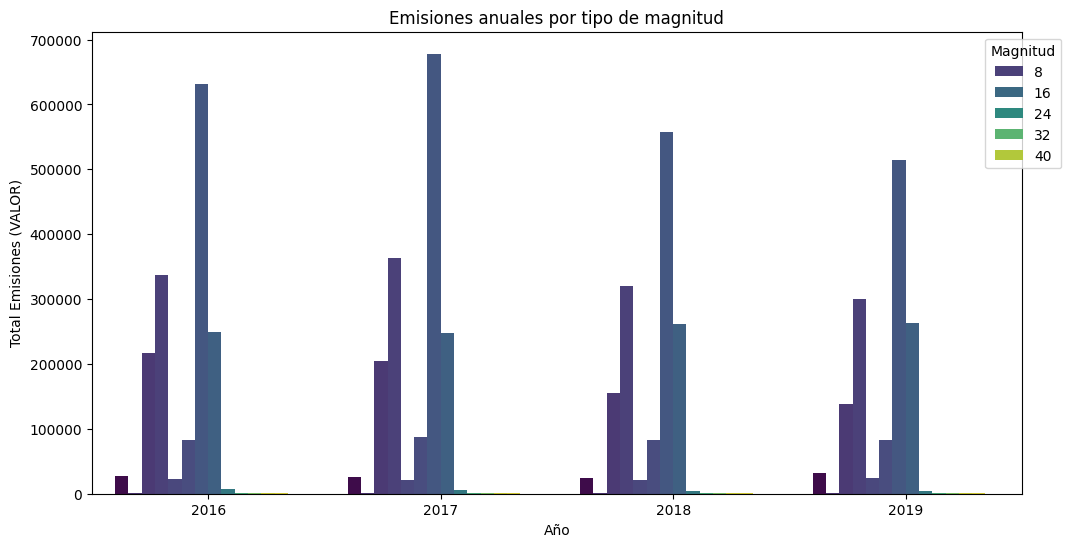

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar por Año y Magnitud (sumando los valores)
df_anual = emisiones.groupby(['ANO', 'MAGNITUD'])['VALOR'].sum().reset_index()

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=df_anual, x='ANO', y='VALOR', hue='MAGNITUD', palette='viridis')
plt.title('Emisiones anuales por tipo de magnitud')
plt.xlabel('Año')
plt.ylabel('Total Emisiones (VALOR)')
plt.legend(title='Magnitud', bbox_to_anchor=(1.05, 1))  # Leyenda fuera del gráfico
plt.show()

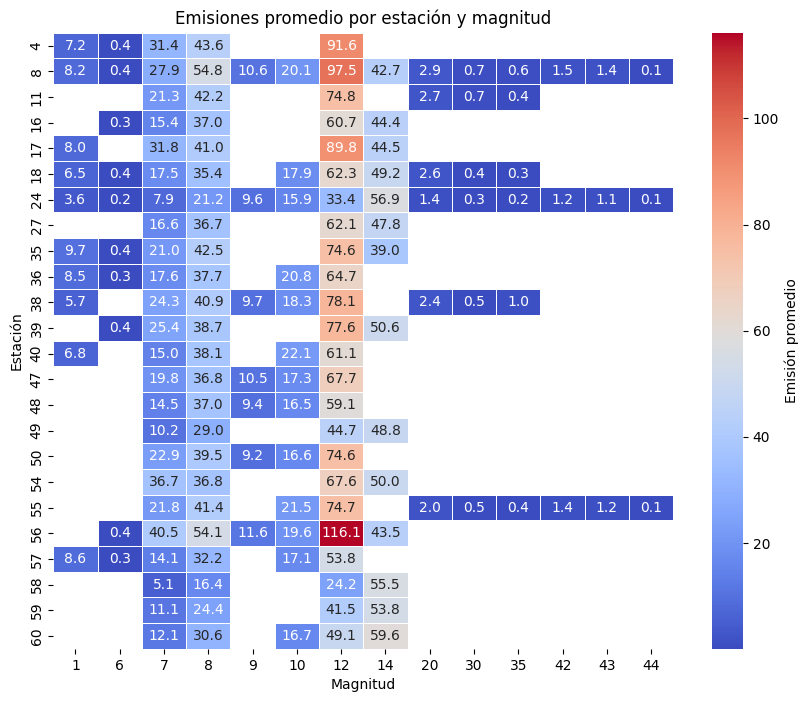

In [10]:
# Pivotear datos para heatmap
heatmap_data = emisiones.pivot_table(
    index='ESTACION', 
    columns='MAGNITUD', 
    values='VALOR', 
    aggfunc='mean'
)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt=".1f", 
    cmap="coolwarm", 
    linewidths=0.5,
    cbar_kws={'label': 'Emisión promedio'}
)
plt.title('Emisiones promedio por estación y magnitud')
plt.xlabel('Magnitud')
plt.ylabel('Estación')
plt.show()

C:\Users\osedr\AppData\Local\Temp\ipykernel_6292\2457934790.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_co2, x='ESTACION', y='VALOR', estimator=sum, ci=None, palette="rocket")
C:\Users\osedr\AppData\Local\Temp\ipykernel_6292\2457934790.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_co2, x='ESTACION', y='VALOR', estimator=sum, ci=None, palette="rocket")


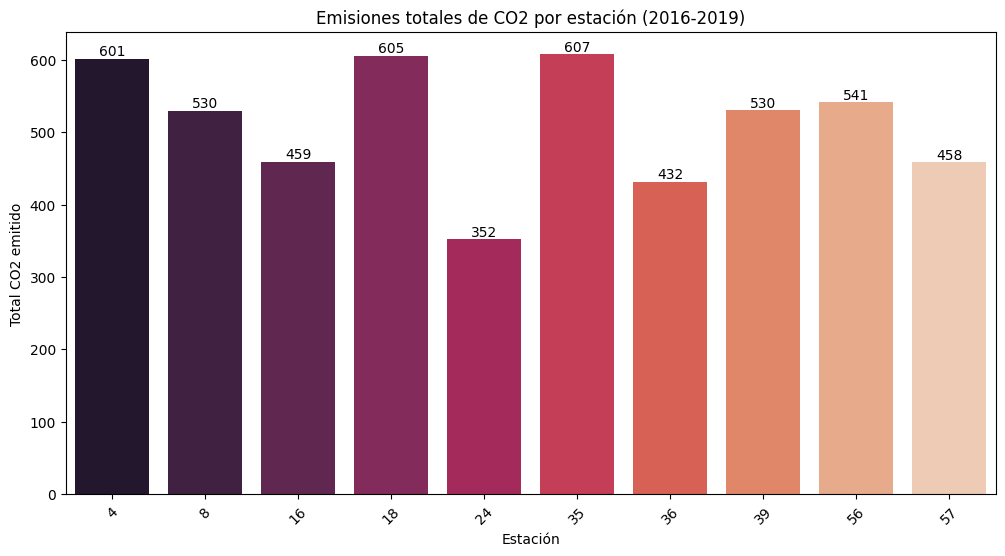

In [12]:
# Filtrar por una magnitud específica (ej. MAGNITUD = 1 para CO2)
df_co2 = emisiones[emisiones['MAGNITUD'] == 6]  # Reemplaza '1' por el código correcto

# Gráfico de barras por estación
plt.figure(figsize=(12, 6))
sns.barplot(data=df_co2, x='ESTACION', y='VALOR', estimator=sum, ci=None, palette="rocket")
plt.title('Emisiones totales de CO2 por estación (2016-2019)')
plt.xlabel('Estación')
plt.ylabel('Total CO2 emitido')
plt.xticks(rotation=45)
# Añadir valores encima de las barras
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom', fontsize=10)
plt.show()

In [13]:
contaminantes = {
    1: "SO2 (Dióxido de Azufre)",
    6: "CO (Monóxido de Carbono)",
    7: "NO (Óxido de Nitrógeno)",
    8: "NO2 (Dióxido de Nitrógeno)",
    9: "PM2.5 (Partículas < 2.5 µm)",
    10: "PM10 (Partículas < 10 µm)",
    12: "NOx (Óxidos de Nitrógeno)",
    14: "O3 (Ozono)",
    20: "TOL (Tolueno)",
    30: "BEN (Benceno)",
    35: "EBE (Etilbenceno)",
    42: "TCH (Hidrocarburos Totales)",
    43: "CH4 (Metano)",
    44: "NMHC (Hidrocarburos no Metánicos)"
}

# Verificar qué códigos existen en tus datos
print("Contaminantes presentes en tus datos:")
for code in emisiones.MAGNITUD.unique():
    print(f"{code}: {contaminantes.get(code, 'Desconocido')}")

Contaminantes presentes en tus datos:
1: SO2 (Dióxido de Azufre)
6: CO (Monóxido de Carbono)
7: NO (Óxido de Nitrógeno)
8: NO2 (Dióxido de Nitrógeno)
12: NOx (Óxidos de Nitrógeno)
9: PM2.5 (Partículas < 2.5 µm)
10: PM10 (Partículas < 10 µm)
14: O3 (Ozono)
20: TOL (Tolueno)
30: BEN (Benceno)
35: EBE (Etilbenceno)
42: TCH (Hidrocarburos Totales)
43: CH4 (Metano)
44: NMHC (Hidrocarburos no Metánicos)


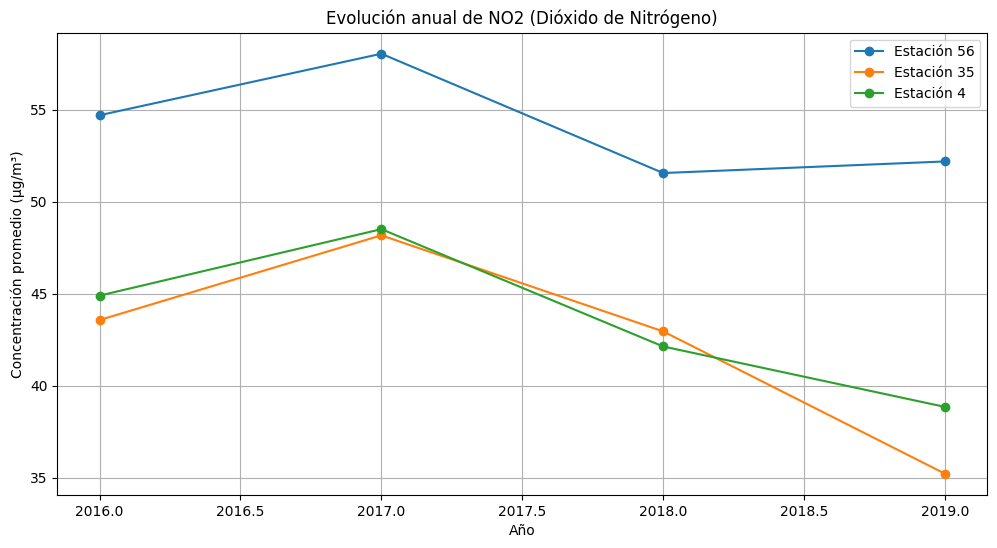

In [14]:
def comparar_estaciones(cod_contaminante, estaciones):
    nombre_contaminante = contaminantes.get(cod_contaminante, f"Contaminante {cod_contaminante}")
    
    plt.figure(figsize=(12, 6))
    
    for estacion in estaciones:
        datos = emisiones[(emisiones.ESTACION == estacion) & 
                         (emisiones.MAGNITUD == cod_contaminante)]
        datos_anual = datos.groupby('ANO')['VALOR'].mean()
        plt.plot(datos_anual.index, datos_anual.values, marker='o', label=f'Estación {estacion}')
    
    plt.title(f'Evolución anual de {nombre_contaminante}')
    plt.xlabel('Año')
    plt.ylabel('Concentración promedio (µg/m³)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Comparar NO2 en tres estaciones
comparar_estaciones(8, [56, 35, 4])  # 8 = NO2

C:\Users\osedr\AppData\Local\Temp\ipykernel_6292\1114171703.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
C:\Users\osedr\AppData\Local\Temp\ipykernel_6292\1114171703.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


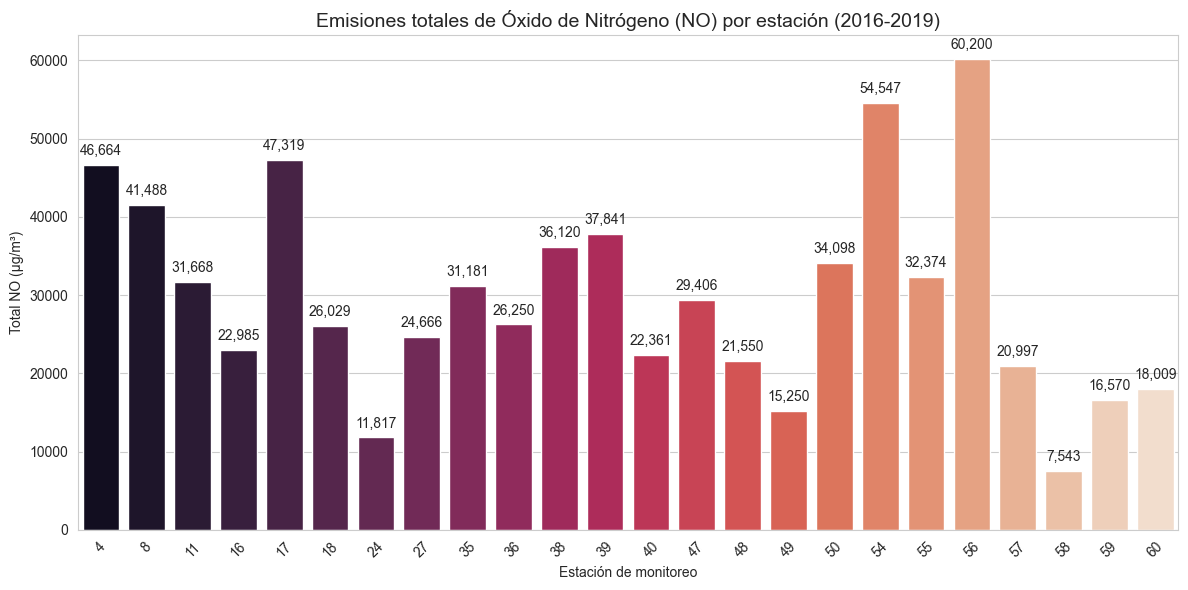

In [18]:
# Filtrar datos para Óxido de Nitrógeno (NO) - código 7
df_no = emisiones[emisiones['MAGNITUD'] == 7].copy()

# Gráfico de barras por estación (suma acumulada)
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df_no, 
    x='ESTACION', 
    y='VALOR', 
    estimator=sum, 
    ci=None, 
    palette="rocket",
    errorbar=None  # Alternativa moderna a ci=None
)

# Personalización
plt.title('Emisiones totales de Óxido de Nitrógeno (NO) por estación (2016-2019)', fontsize=14)
plt.xlabel('Estación de monitoreo')
plt.ylabel('Total NO (µg/m³)')
plt.xticks(rotation=45)

# Añadir etiquetas de valor
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():,.0f}", 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='bottom', 
        fontsize=10,
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()

In [ ]:
sns.pairplot(emisiones, hue="MAGNITUD")
